Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the datasets
foursquare_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\df_all_foursquare.csv"
yelp_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\df_all_yelp.csv"
bikes_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\df_bikes.csv"
df_foursquare = pd.read_csv(foursquare_path)
df_yelp = pd.read_csv(yelp_path)
df_bikes = pd.read_csv(bikes_path)

# Merge df_bikes with df_all_foursquare
df_merge_foursquare = pd.merge(df_bikes, df_foursquare, on=['bike_latitude', 'bike_longitude'], how='inner')

# Merge the above dataframe with df_all_yelp
df_all = pd.merge(df_merge_foursquare, df_yelp, on=['bike_latitude', 'bike_longitude'], how='inner', suffixes=('_foursquare', '_yelp'))
df_all.to_csv("C:\\Users\\wamm1\\Desktop\\P3-Statistical-Modelling-Project\\data\\df_all.csv", index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

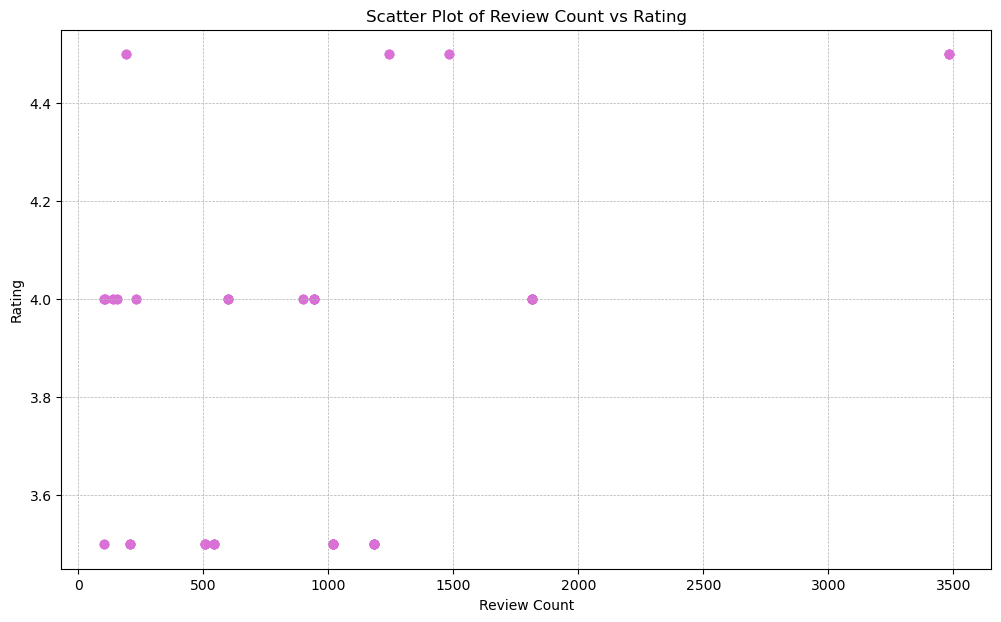

Correlation Coefficient: 0.4144885400762401


In [2]:


# Scatter plot for review_count vs rating
plt.figure(figsize=(12, 7))
plt.scatter(df_all['review_count'], df_all['rating'], alpha=0.6, color='orchid')
plt.title('Scatter Plot of Review Count vs Rating')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Calculate the correlation coefficient between review_count and rating
correlation = df_all['review_count'].corr(df_all['rating'])
print(f"Correlation Coefficient: {correlation}")


The correlation coefficient between review_count and rating is approximately 0.4140.414.
This positive value indicates a moderate positive relationship between the number of reviews and the rating. In other words, there's a tendency for businesses with more reviews to have higher ratings, but the relationship isn't particularly strong.

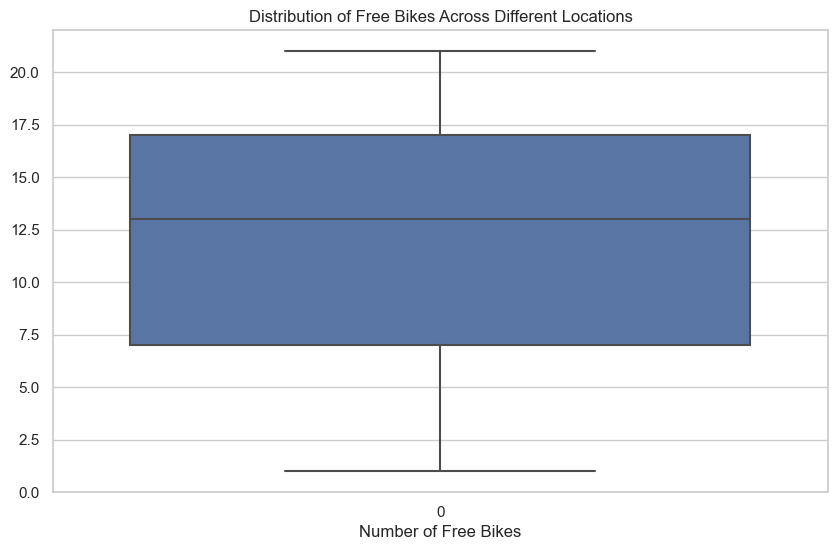

In [3]:

import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a box plot of free_bikes
plt.figure(figsize=(10, 6))
sns.boxplot(df_all['free_bikes'])
plt.title('Distribution of Free Bikes Across Different Locations')
plt.xlabel('Number of Free Bikes')
plt.show()


The boxplot showcases the distribution of free bikes across different locations. The majority of the locations seem to have between 6 to 17 free bikes, with some outliers on both ends of the distribution.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [4]:
import sqlite3
from sqlite3 import Error
import pandas as pd

foursquare_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\df_all_foursquare.csv"
yelp_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\df_all_yelp.csv"
bikes_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\df_bikes.csv"
# Create a connection to SQLite database
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

# Define paths and create a new SQLite database
db_path = r"C:\Users\wamm1\Desktop\P3-Statistical-Modelling-Project\data\pois_data_database.db"
connection = create_connection(db_path)

# Create tables in the SQLite database
create_bike_stations_table = """
CREATE TABLE IF NOT EXISTS bike_stations (
    station_id INTEGER PRIMARY KEY,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    free_bikes INTEGER NOT NULL
);
"""
create_foursquare_pois_table = """
CREATE TABLE IF NOT EXISTS foursquare_pois (
    poi_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    distance REAL NOT NULL,
    address TEXT,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    station_id INTEGER,
    FOREIGN KEY (station_id) REFERENCES bike_stations (station_id)
);
"""
create_yelp_pois_table = """
CREATE TABLE IF NOT EXISTS yelp_pois (
    poi_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    review_count INTEGER NOT NULL,
    categories TEXT,
    rating REAL NOT NULL,
    address TEXT,
    phone TEXT,
    distance REAL NOT NULL,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    station_id INTEGER,
    FOREIGN KEY (station_id) REFERENCES bike_stations (station_id)
);
"""
execute_query(connection, create_bike_stations_table)
execute_query(connection, create_foursquare_pois_table)
execute_query(connection, create_yelp_pois_table)

# Load the datasets
df_all_foursquare = pd.read_csv(foursquare_path)
df_all_yelp = pd.read_csv(yelp_path)
df_bikes = pd.read_csv(bikes_path)

# Populate 'bike_stations' table
for _, row in df_bikes.iterrows():
    query = f"""
    INSERT INTO bike_stations (latitude, longitude, free_bikes)
    VALUES ({row['bike_latitude']}, {row['bike_longitude']}, {row['free_bikes']});
    """
    execute_query(connection, query)

# Populate 'foursquare_pois' table
for _, row in df_all_foursquare.iterrows():
    query = f"""
    INSERT INTO foursquare_pois (name, distance, address, latitude, longitude, station_id)
    VALUES ("{row['name']}", {row['distance']}, "{row['address']}", {row['bike_latitude']}, {row['bike_longitude']}, {row.name + 1});
    """
    execute_query(connection, query)

# Populate 'yelp_pois' table
for _, row in df_all_yelp.iterrows():
    query = f"""
    INSERT INTO yelp_pois (name, review_count, categories, rating, address, phone, distance, latitude, longitude, station_id)
    VALUES ("{row['name']}", {row['review_count']}, "{row['categories']}", {row['rating']}, "{row['address']}", "{row['phone']}", {row['distance']}, {row['bike_latitude']}, {row['bike_longitude']}, {row.name + 1});
    """
    execute_query(connection, query)

print("Columns in df_all_foursquare:", df_all_foursquare.columns)
print("Columns in df_bikes:", df_bikes.columns)



Connection to SQLite DB successful
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query execute

Look at the data before and after the join to validate your data.

Ran example queries using SQLite extention to verify the integrity of the database.
SELECT * FROM bike_stations
SELECT * FROM foursquare_pois
SELECT * FROM yelp_pois